In [1]:
# import libraries

import pandas as pd
import re

from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [17]:
# load dataset

dataset = pd.read_csv('/home/hanping/remote file/MFB/dataset/text/news_analysis.csv')
dataset.head()

,date,polarity,sentiment
0,2021/1/15 3:51,1,cryptocurrencies price prediction bitcoin dash...
1,2021/1/15 7:12,1,jerome powell confirms the fed is studying sta...
2,2021/1/15 7:48,0,ichimoku cloud analysis brent vs us btcusd is ...
3,2021/1/15 9:03,0,bitcoin bubble will pop sooner or later says f...
4,2021/1/15 9:10,0,bitcoin cash price prediction bch technicals t...


In [18]:
news = dataset["sentiment"]
news.head()

0    cryptocurrencies price prediction bitcoin dash...
1    jerome powell confirms the fed is studying sta...
2    ichimoku cloud analysis brent vs us btcusd is ...
3    bitcoin bubble will pop sooner or later says f...
4    bitcoin cash price prediction bch technicals t...
Name: sentiment, dtype: object

In [19]:
# shape of tweets (Number of tweets)
news.shape

(1828,)

In [20]:
string = pd.Series(news).str.cat(sep=' ')

In [21]:
stopwords = set(STOPWORDS)
stopwords.update(["elonmusk","elon musk","elon","musk","spacex"]) #adding our own stopwords

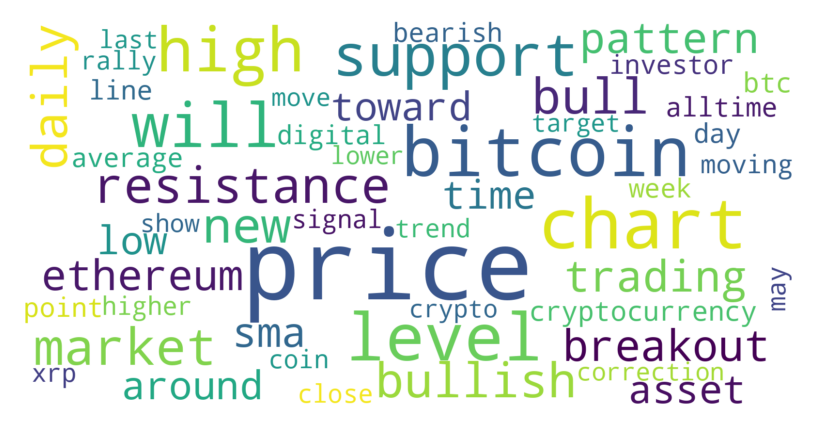

In [28]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(5,6),dpi=200)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
dataset = pd.read_csv('/home/hanping/remote file/MFB/dataset/text/tweets_analysis.csv')
dataset.head()

,date,polarity,sentiment
0,2021/2/10 23:59,1,blue ridge bank shares halted by nyse after bi...
1,2021/2/10 23:58,1,today thats this thursday we will do a take wi...
2,2021/2/10 23:54,1,guys evening i have read this article about bt...
3,2021/2/10 23:54,1,a big chance in a billion price bitcoin fx btc...
4,2021/2/10 23:54,1,this network is secured by nodes as of today s...


In [30]:
# Tweet Text cloumn
tweet = dataset["sentiment"]
tweet.head()

0    blue ridge bank shares halted by nyse after bi...
1    today thats this thursday we will do a take wi...
2    guys evening i have read this article about bt...
3    a big chance in a billion price bitcoin fx btc...
4    this network is secured by nodes as of today s...
Name: sentiment, dtype: object

In [31]:
# shape of tweets (Number of tweets)
tweet.shape

(122604,)

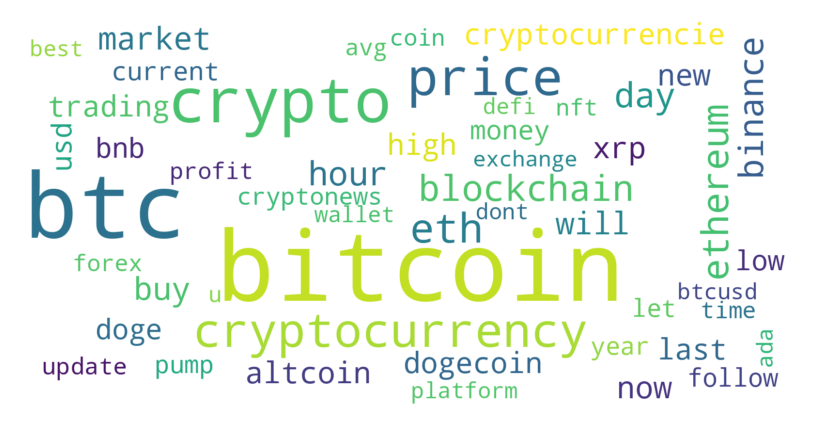

In [35]:
string_tweet = pd.Series(tweet).str.cat(sep=' ')

stopwords = set(STOPWORDS)
stopwords.update(["elonmusk", "elon musk", "elon", "musk", "spacex","USER_MENTION","URL","EMO_NEG","EMO_POS"])  #adding our own stopwords

wordcloud = WordCloud(width=1600, stopwords=stopwords, height=800, max_font_size=200, max_words=50, collocations=False,
                      background_color='white').generate(string_tweet)
plt.figure(figsize=(5,6),dpi=200)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
news_data = pd.read_csv('/home/hanping/remote file/MFB/dataset/text/news_analysis.csv')

In [37]:
news_data['date'] = pd.to_datetime(news_data['date'])

In [38]:
news_data['date']=news_data['date'].dt.strftime("%Y-%m-%d")
news_data.head()

,date,polarity,sentiment
0,2021-01-15,1,cryptocurrencies price prediction bitcoin dash...
1,2021-01-15,1,jerome powell confirms the fed is studying sta...
2,2021-01-15,0,ichimoku cloud analysis brent vs us btcusd is ...
3,2021-01-15,0,bitcoin bubble will pop sooner or later says f...
4,2021-01-15,0,bitcoin cash price prediction bch technicals t...


In [39]:
#news_data['date'] = news_data['date'].map(lambda date : str(date.year)+ "-"+ str(date.month) + "-"+ str(date.day))
bitcoin_daily_news = news_data.groupby('date')['sentiment'].count().reset_index()
bitcoin_daily_news.sort_values('date')
bitcoin_daily_news.rename(columns = {'date' : 'Day',
                                  'sentiment' : 'News'}, inplace = True)
bitcoin_daily_news.head(7)

,Day,News
0,2021-01-15,13
1,2021-01-16,5
2,2021-01-17,3
3,2021-01-18,17
4,2021-01-19,17
5,2021-01-22,11
6,2021-01-23,4


In [73]:
import plotly.offline as pyoff
import plotly.graph_objs as go


def plot_News(df, col1, col2, cat, plot_type=go.Scatter):
    plot_data = [
        plot_type(
            x=df[col1],
            y=df[col2],
        )
    ]

    plot_layout = go.Layout(
        xaxis={"type": cat},
    )
    fig = go.Figure(data=plot_data, layout=plot_layout)
# 添加新的坐标轴
    new_xaxis = go.layout.XAxis(
        title="Time"
    )
    new_yaxis = go.layout.YAxis(
        title="Number of News"
    )

    fig.add_trace(plot_data[0])
    fig.update_xaxes(new_xaxis)
    fig.update_yaxes(new_yaxis)
    pyoff.iplot(fig)


In [74]:
plot_News(bitcoin_daily_news, 'Day','News','category', go.Bar)

In [75]:
tweets_data = pd.read_csv('/home/hanping/remote file/MFB/tweets_processed_data.csv')
tweets_data = tweets_data.sort_values(by='date')
tweets_data['date'] = pd.to_datetime(tweets_data['date'])
tweets_data['date']=tweets_data['date'].dt.strftime("%Y-%m-%d")
bitcoin_daily_tweets = tweets_data.groupby('date')['sentiment'].count().reset_index()
bitcoin_daily_tweets.rename(columns = {'date' : 'Day',
                                     'sentiment' : 'Tweets'}, inplace = True)
bitcoin_daily_tweets.head(7)

,Day,Tweets
0,2021-01-01,802
1,2021-01-02,1966
2,2021-01-03,1636
3,2021-01-04,1329
4,2021-01-05,1109
5,2021-01-06,1387
6,2021-01-07,1872


In [78]:
import plotly.offline as pyoff
import plotly.graph_objs as go


def plot_Tweets(df, col1, col2, cat, plot_type=go.Scatter):
    plot_data = [
        plot_type(
            x=df[col1],
            y=df[col2],
        )
    ]


    plot_layout = go.Layout(
        xaxis={"type": cat},
    )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    # 添加新的坐标轴
    new_xaxis = go.layout.XAxis(
        title="Time"
    )
    new_yaxis = go.layout.YAxis(
        title="Number of Tweets"
    )

    fig.add_trace(plot_data[0])
    fig.update_xaxes(new_xaxis)
    fig.update_yaxes(new_yaxis)
    pyoff.iplot(fig)


plot_Tweets(bitcoin_daily_tweets, 'Day', 'Tweets', 'category', go.Bar)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

sid_obj = SentimentIntensityAnalyzer()

df = pd.read_csv("/home/hanping/remote file/MFB/dataset/text/news_analysis.csv", low_memory=False)

#df["sentiment_score"] = df["sentiment"].apply(lambda x: sid_obj.polarity_scores(str(x)))

compound = []
for i,s in enumerate(tqdm(df["sentiment"])):
    vs = sid_obj.polarity_scores(s)
    compound.append(vs["compound"])
df["compound"] = compound

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1828/1828 [00:12<00:00, 143.30it/s]


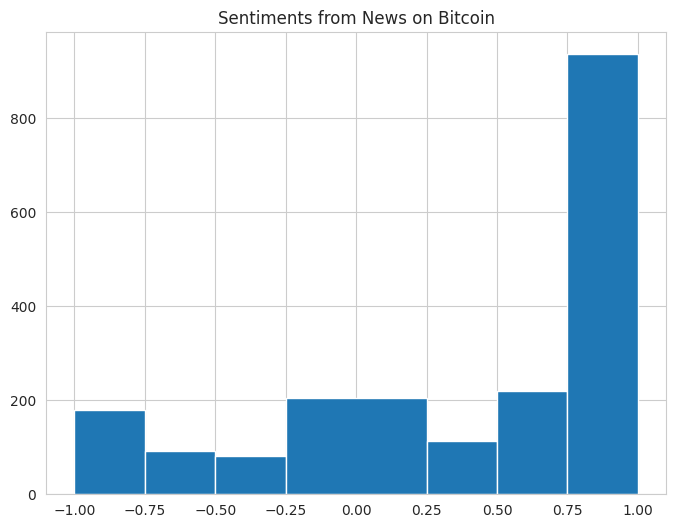

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df['compound'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax)

plt.title("Sentiments from News on Bitcoin")
plt.show()

In [37]:
#To get a better visual of the polarit values, it can be helpful to remove the polarity values equal to zero and create a break in the histogram at zero.
# Remove polarity values equal to zero
sentiment_df = df[df.compound != 0]

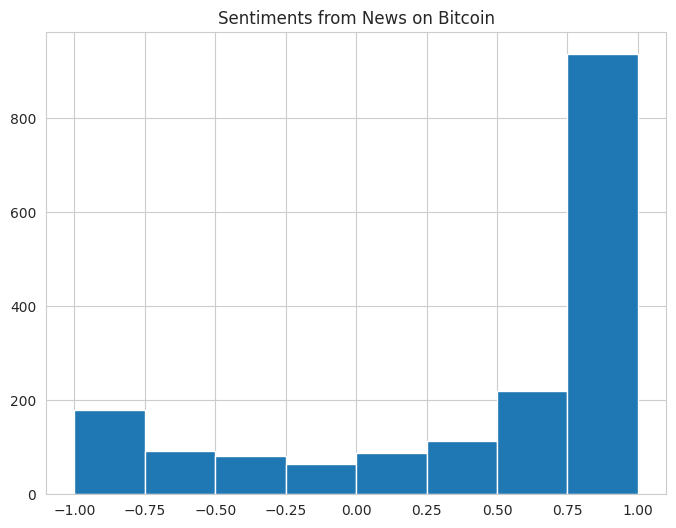

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df['compound'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax)

plt.title("Sentiments from News on Bitcoin")
plt.show()

In [39]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

sid_obj = SentimentIntensityAnalyzer()

df = pd.read_csv("/home/hanping/remote file/MFB/tweets_processed_data.csv", low_memory=False)

#df["sentiment_score"] = df["sentiment"].apply(lambda x: sid_obj.polarity_scores(str(x)))

compound = []
for i,s in enumerate(tqdm(df["sentiment"])):
    vs = sid_obj.polarity_scores(s)
    compound.append(vs["compound"])
df["compound"] = compound

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 161443/161443 [00:22<00:00, 7178.87it/s]


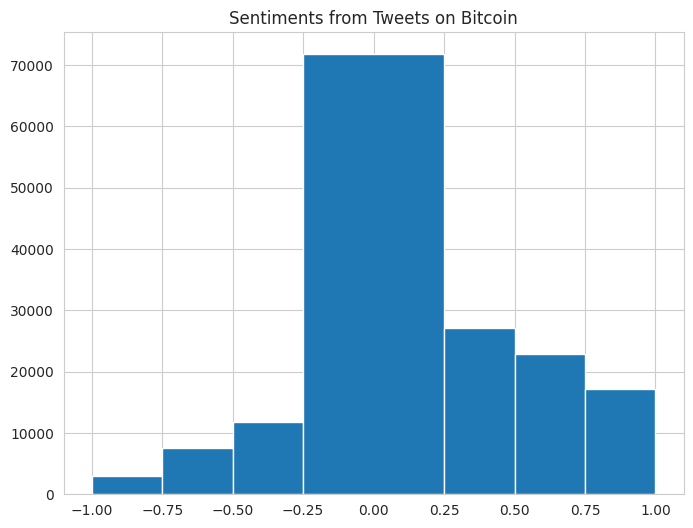

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df['compound'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax)

plt.title("Sentiments from Tweets on Bitcoin")
plt.show()

In [41]:
#To get a better visual of the polarit values, it can be helpful to remove the polarity values equal to zero and create a break in the histogram at zero.
# Remove polarity values equal to zero
sentiment_df = df[df.compound != 0]

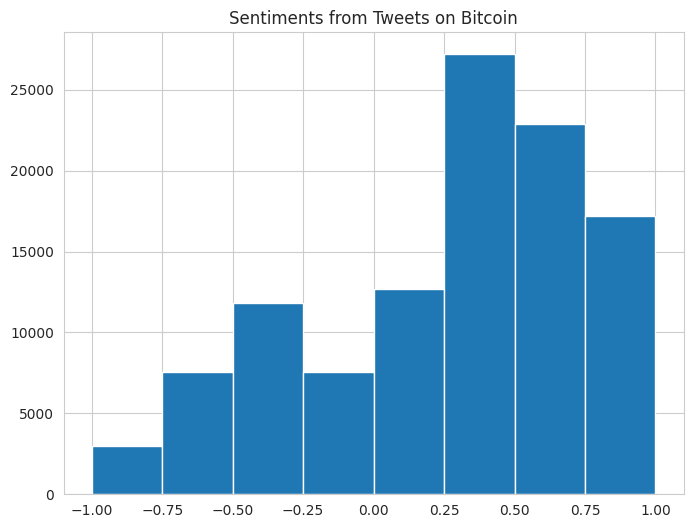

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df['compound'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax)

plt.title("Sentiments from Tweets on Bitcoin")
plt.show()

In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sid_obj = SentimentIntensityAnalyzer()

df = pd.read_csv("/home/hanping/remote file/MFB/dataset/text/news_analysis.csv", low_memory=False)
df1 = pd.read_csv("/home/hanping/remote file/MFB/dataset/text/tweets_analysis.csv", low_memory=False)

def find_sentiment(tweet):
    if sid_obj.polarity_scores(tweet)["compound"] > 0:
        return "POSITIVE"
    elif sid_obj.polarity_scores(tweet)["compound"] < 0:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

In [3]:
vader_sentiments = df.sentiment.apply(find_sentiment)
df['vader-sentiment'] = vader_sentiments
df[['sentiment', 'vader-sentiment']].head(3)

,sentiment,vader-sentiment
0,cryptocurrencies price prediction bitcoin dash...,POSITIVE
1,jerome powell confirms the fed is studying sta...,POSITIVE
2,ichimoku cloud analysis brent vs us btcusd is ...,NEGATIVE


In [4]:
vader_sentiments = df1.sentiment.apply(find_sentiment)
df1['vader-sentiment'] = vader_sentiments
df1[['sentiment', 'vader-sentiment']].head(3)

,sentiment,vader-sentiment
0,blue ridge bank shares halted by nyse after bi...,POSITIVE
1,today thats this thursday we will do a take wi...,POSITIVE
2,guys evening i have read this article about bt...,POSITIVE


Distribution of classes on News: Vader


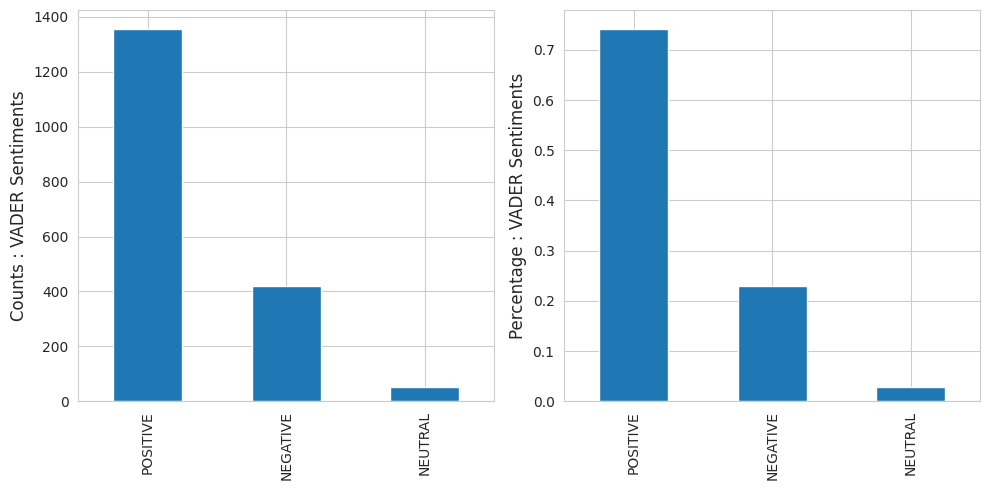

In [34]:
print("Distribution of classes on News: Vader")
counts = df['vader-sentiment'].value_counts()
percent = counts/sum(counts)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

counts.plot(kind='bar', ax=ax1)
percent.plot(kind='bar', ax=ax2)
ax1.set_ylabel('Counts : VADER Sentiments', size=12)
ax2.set_ylabel('Percentage : VADER Sentiments', size=12)
plt.tight_layout()
plt.show()

Distribution of classes on Tweets: Vader


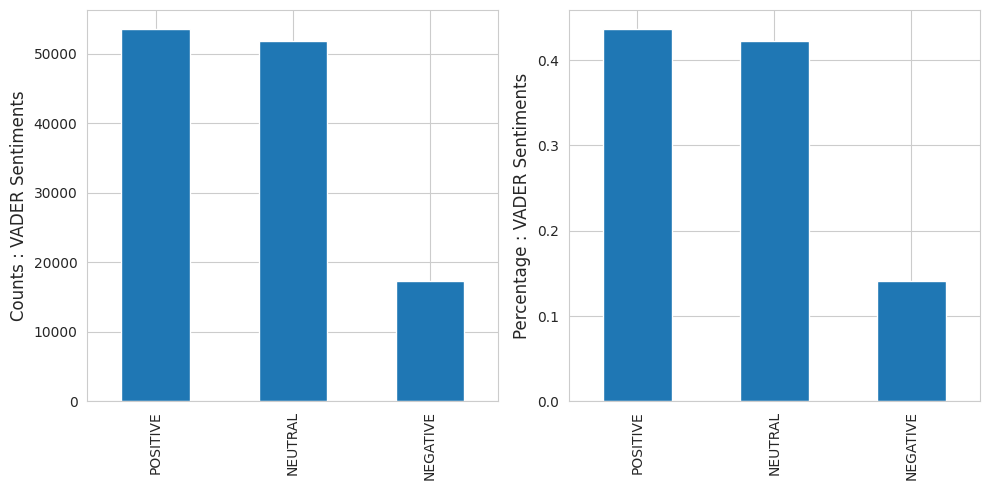

In [35]:
print("Distribution of classes on Tweets: Vader")
counts = df1['vader-sentiment'].value_counts()
percent = counts/sum(counts)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

counts.plot(kind='bar', ax=ax1)
percent.plot(kind='bar', ax=ax2)
ax1.set_ylabel('Counts : VADER Sentiments', size=12)
ax2.set_ylabel('Percentage : VADER Sentiments', size=12)
plt.tight_layout()
plt.show()

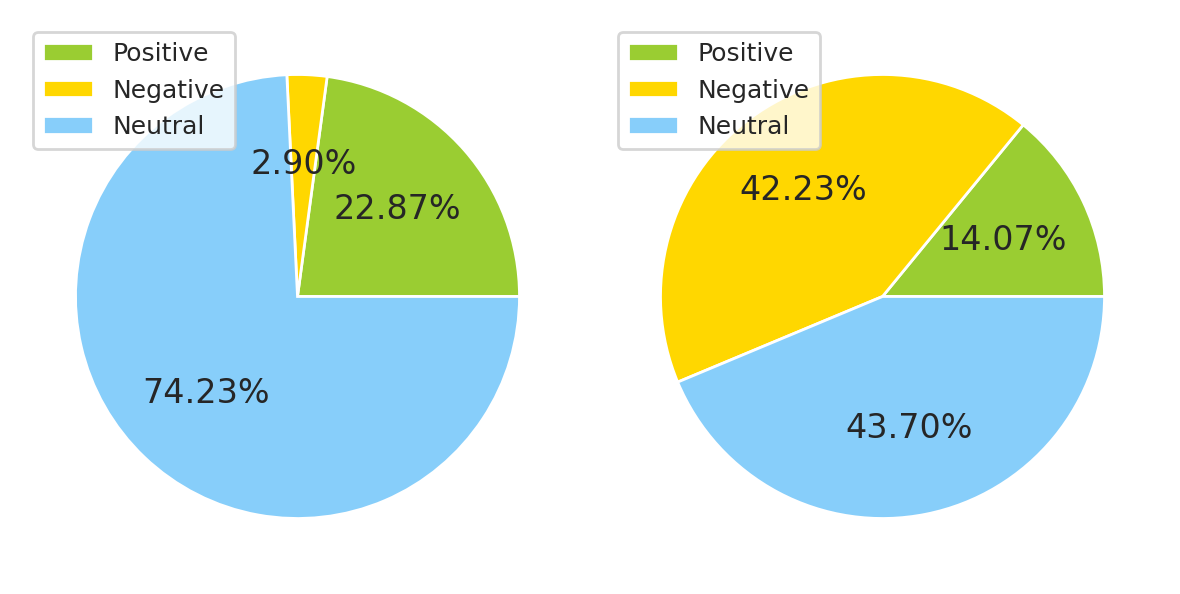

In [64]:
def label_function(val):
    return f'{val:.2f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,6),dpi=200)

# 指定每个切片的颜色
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

# 不传递labels参数，而是获取返回值
wedges1, texts1, autotexts1 = ax1.pie(df.groupby('vader-sentiment').size(), colors=colors, autopct=label_function, textprops={'fontsize': 12})
wedges2, texts2, autotexts2 = ax2.pie(df1.groupby('vader-sentiment').size(), colors=colors, autopct=label_function, textprops={'fontsize': 12})

labels = ['Positive','Negative','Neutral']
ax1.legend(wedges1, labels, loc="best",fontsize=9)
ax2.legend(wedges2, labels, loc="best",fontsize=9)
#plt.axis('equal')
plt.tight_layout()
plt.show()

In [2]:
btc = pd.read_csv("/home/hanping/remote file/MFB/dataset/processed/btc.csv")
btc.head()

,Open,High,Low,Close,Volume,date
0,28923.63,29031.34,28690.17,28995.13,2311.811445,2021-01-01T00:00
1,28995.13,29470.00,28960.35,29409.99,5403.068471,2021-01-01T01:00
2,29410.00,29465.26,29120.03,29194.65,2384.231560,2021-01-01T02:00
3,29195.25,29367.00,29150.02,29278.40,1461.345077,2021-01-01T03:00
4,29278.41,29395.00,29029.40,29220.31,2038.046803,2021-01-01T04:00


In [61]:
ti=pd.read_csv('/home/hanping/remote file/MFB/ti.csv')
ti=ti.drop('Close',axis=1)
ti.head()

,Stochastic,ADI,EMA,MACD,RSI,OBV,ATR
0,86.781857,1225550.420,28876.78754,133.534560,55.394904,535353.6668,378.718086
1,96.295679,1229681.093,28947.88120,164.922849,62.207462,540756.7353,388.070365
2,83.003086,1228327.545,28980.78371,170.457230,57.314228,538372.5037,385.010339
3,85.898804,1228595.460,29020.46588,179.531664,58.675685,539833.8488,373.008172
4,78.456428,1228685.879,29047.11176,179.961357,57.310301,537795.8020,372.479017


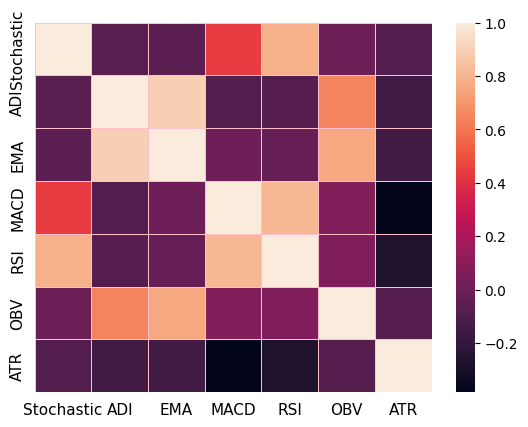

In [64]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 计算相关性矩阵
corr = ti.corr()

ax=sns.heatmap(corr,linewidth=0.5,linecolor='PINK')
ax.tick_params(labelsize=11)
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.show()

In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# 读取数据
df = pd.read_csv("/home/hanping/remote file/MFB/ti.csv")
df.head()

,Stochastic,ADI,EMA,MACD,RSI,OBV,ATR,Close
0,86.781857,1225550.420,28876.78754,133.534560,55.394904,535353.6668,378.718086,28995.13
1,96.295679,1229681.093,28947.88120,164.922849,62.207462,540756.7353,388.070365,29409.99
2,83.003086,1228327.545,28980.78371,170.457230,57.314228,538372.5037,385.010339,29194.65
3,85.898804,1228595.460,29020.46588,179.531664,58.675685,539833.8488,373.008172,29278.40
4,78.456428,1228685.879,29047.11176,179.961357,57.310301,537795.8020,372.479017,29220.31


In [50]:
btc.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999487,0.999175,0.998904,-0.319383
High,0.999487,1.000000,0.998943,0.999467,-0.306368
Low,0.999175,0.998943,1.000000,0.999343,-0.341268
Close,0.998904,0.999467,0.999343,1.000000,-0.320962
Volume,-0.319383,-0.306368,-0.341268,-0.320962,1.000000


/home/hanping/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


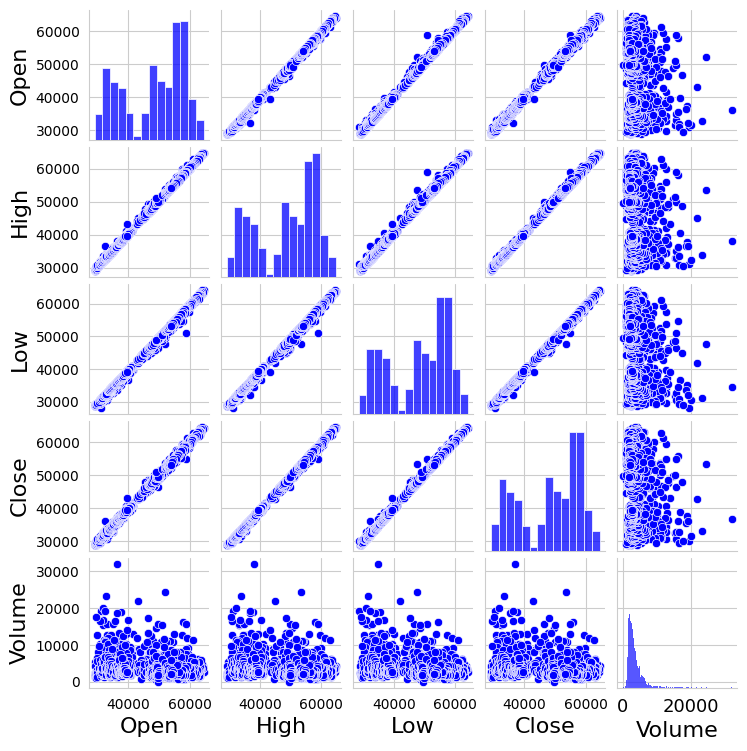

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.pairplot(btc, size=1.5,
                  diag_kws={'color':'#0000FF'},
                  plot_kws={'color':'#0000FF'})
for ax in ax.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'

ax.tick_params(labelsize=13)
plt.show()

In [9]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

sid_obj = SentimentIntensityAnalyzer()

tweets = pd.read_csv("/home/hanping/remote file/MFB/tweets_processed_data.csv", low_memory=False)

#df["sentiment_score"] = df["sentiment"].apply(lambda x: sid_obj.polarity_scores(str(x)))

compound = []
for i,s in enumerate(tqdm(tweets["sentiment"])):
    vs = sid_obj.polarity_scores(s)
    compound.append(vs["compound"])
tweets["compound"] = compound

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 161443/161443 [00:22<00:00, 7165.44it/s]


In [10]:
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

tweets_grouped = tweets.groupby(pd.Grouper(freq = 'H'))['compound'].sum()

btc['date'] = pd.to_datetime(btc['date'])
btc.index = btc['date']

btc_grouped = btc.groupby(pd.Grouper(freq = 'H'))['Close'].mean()

In [28]:
path='/home/hanping/remote file/MFB/'

In [29]:
btc_grouped.to_csv(path+'btc_grouped.csv')
tweets_grouped.to_csv(path+'text_grouped.csv')

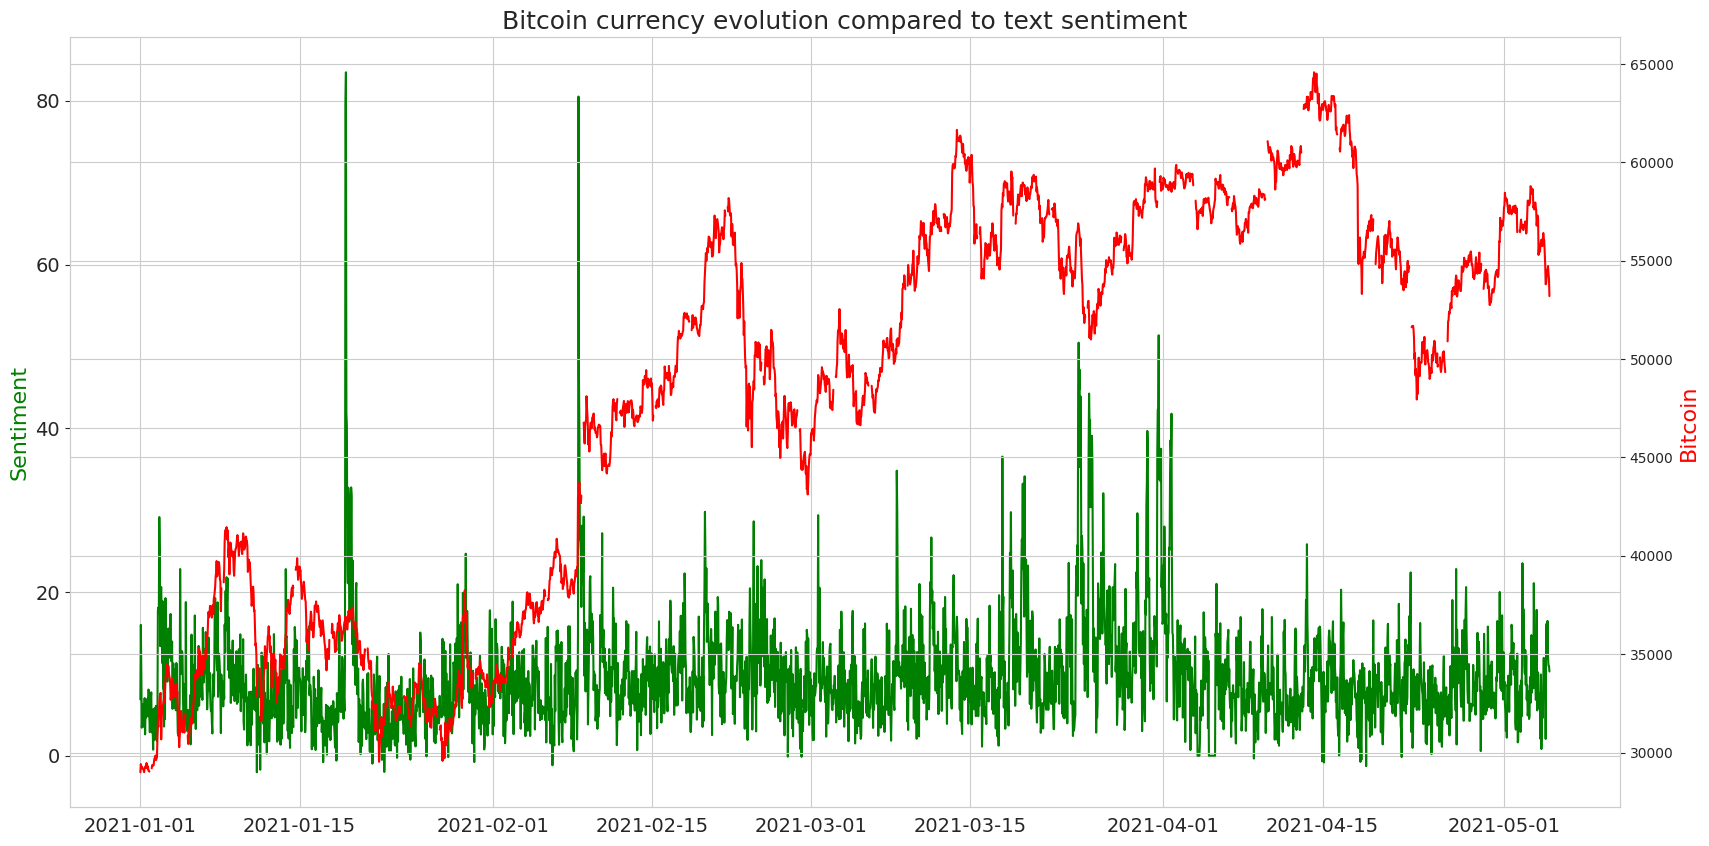

In [59]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Bitcoin currency evolution compared to text sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(btc_grouped.index, btc_grouped, 'r-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin", color='r', fontsize=16)
plt.show()

In [12]:
# Define the cross-correlation function

def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation.
    Parameters
    —------—
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    —------—
    crosscorr : float
    """
    return datax.corr(datay.shift(lag), method=method)

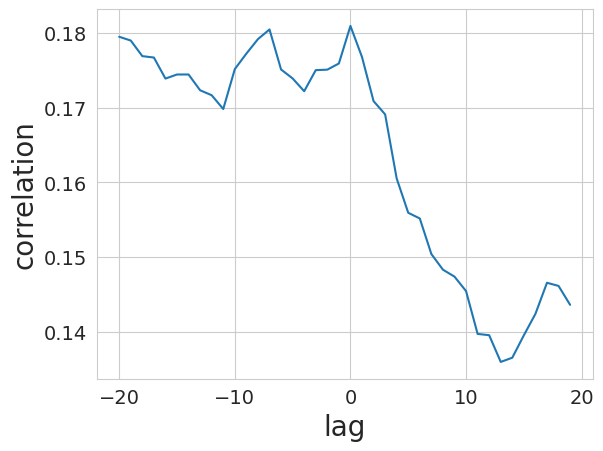

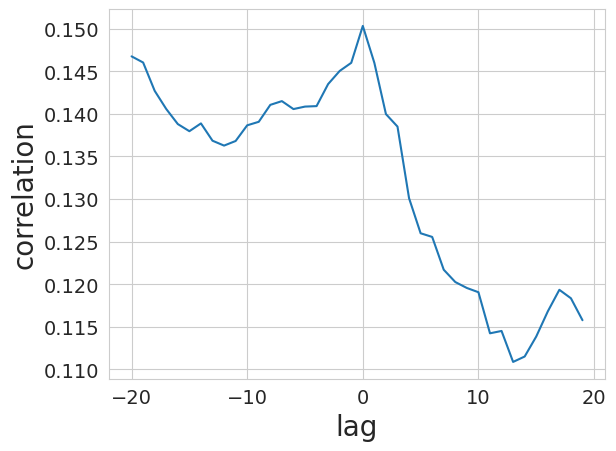

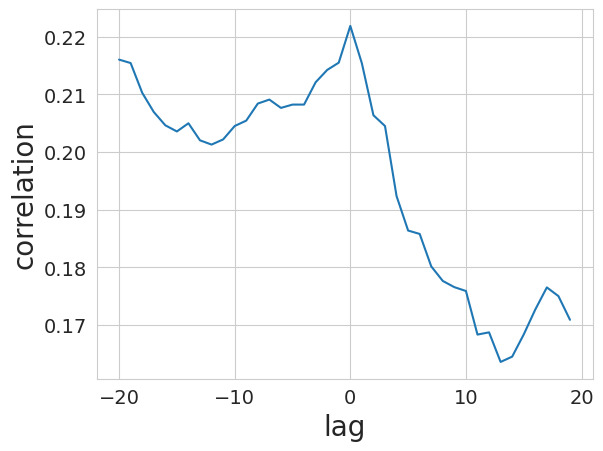

In [33]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

xcov = [crosscorr(tweets_grouped, btc_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.xlabel("lag", fontsize=20)
plt.ylabel("correlation", fontsize=20)
plt.tick_params(labelsize=14)
plt.show()
plt.show()

xcov = [crosscorr(tweets_grouped, btc_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.xlabel("lag", fontsize=20)
plt.ylabel("correlation", fontsize=20)
plt.tick_params(labelsize=14)
plt.show()
plt.show()

xcov = [crosscorr(tweets_grouped, btc_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.xlabel("lag", fontsize=20)
plt.ylabel("correlation", fontsize=20)
plt.tick_params(labelsize=14)
plt.show()
plt.show()

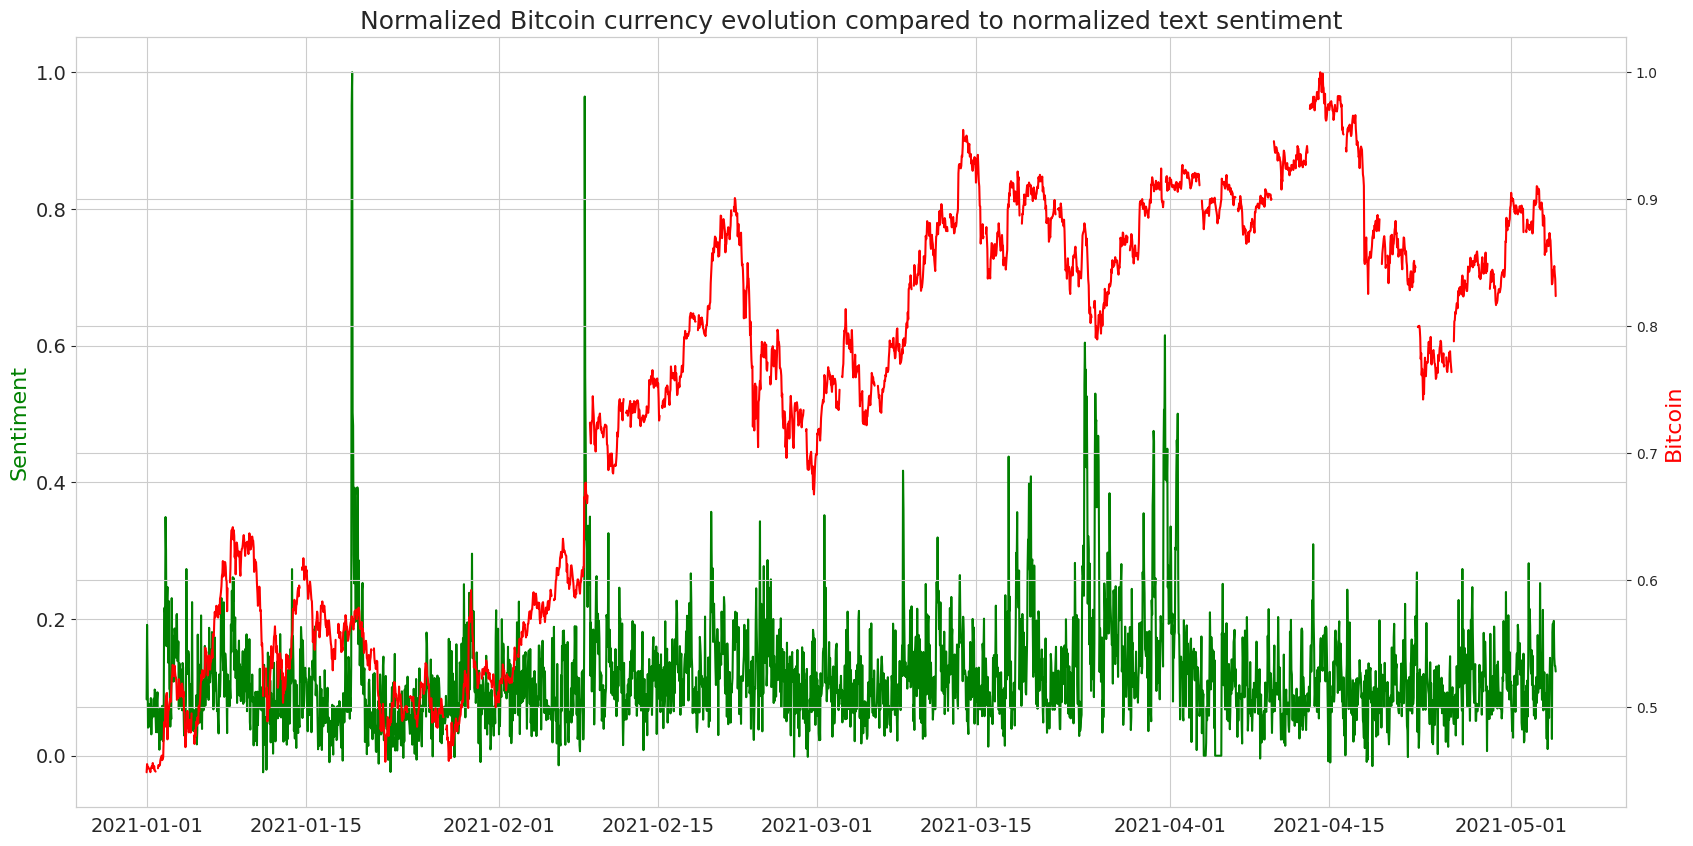

In [31]:
# Normalize time series data
tweets_grouped = tweets_grouped / max(tweets_grouped.max(), abs(tweets_grouped.min()))
btc_grouped = btc_grouped / max(btc_grouped.max(), abs(btc_grouped.min()))

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Normalized Bitcoin currency evolution compared to normalized text sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(btc_grouped.index, btc_grouped, 'r-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin", color='r', fontsize=16)
plt.show()

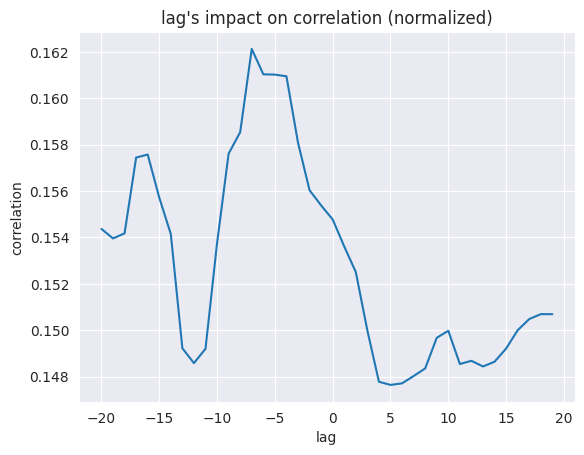

In [111]:
xcov = [crosscorr(tweets_grouped, btc_grouped, lag=i) for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("lag's impact on correlation (normalized)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

In [13]:
# Derivative
import numpy as np
tweets_grouped = pd.Series(np.gradient(tweets_grouped.values), tweets_grouped.index, name='slope')
btc_grouped = pd.Series(np.gradient(btc_grouped.values), btc_grouped.index, name='slope')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


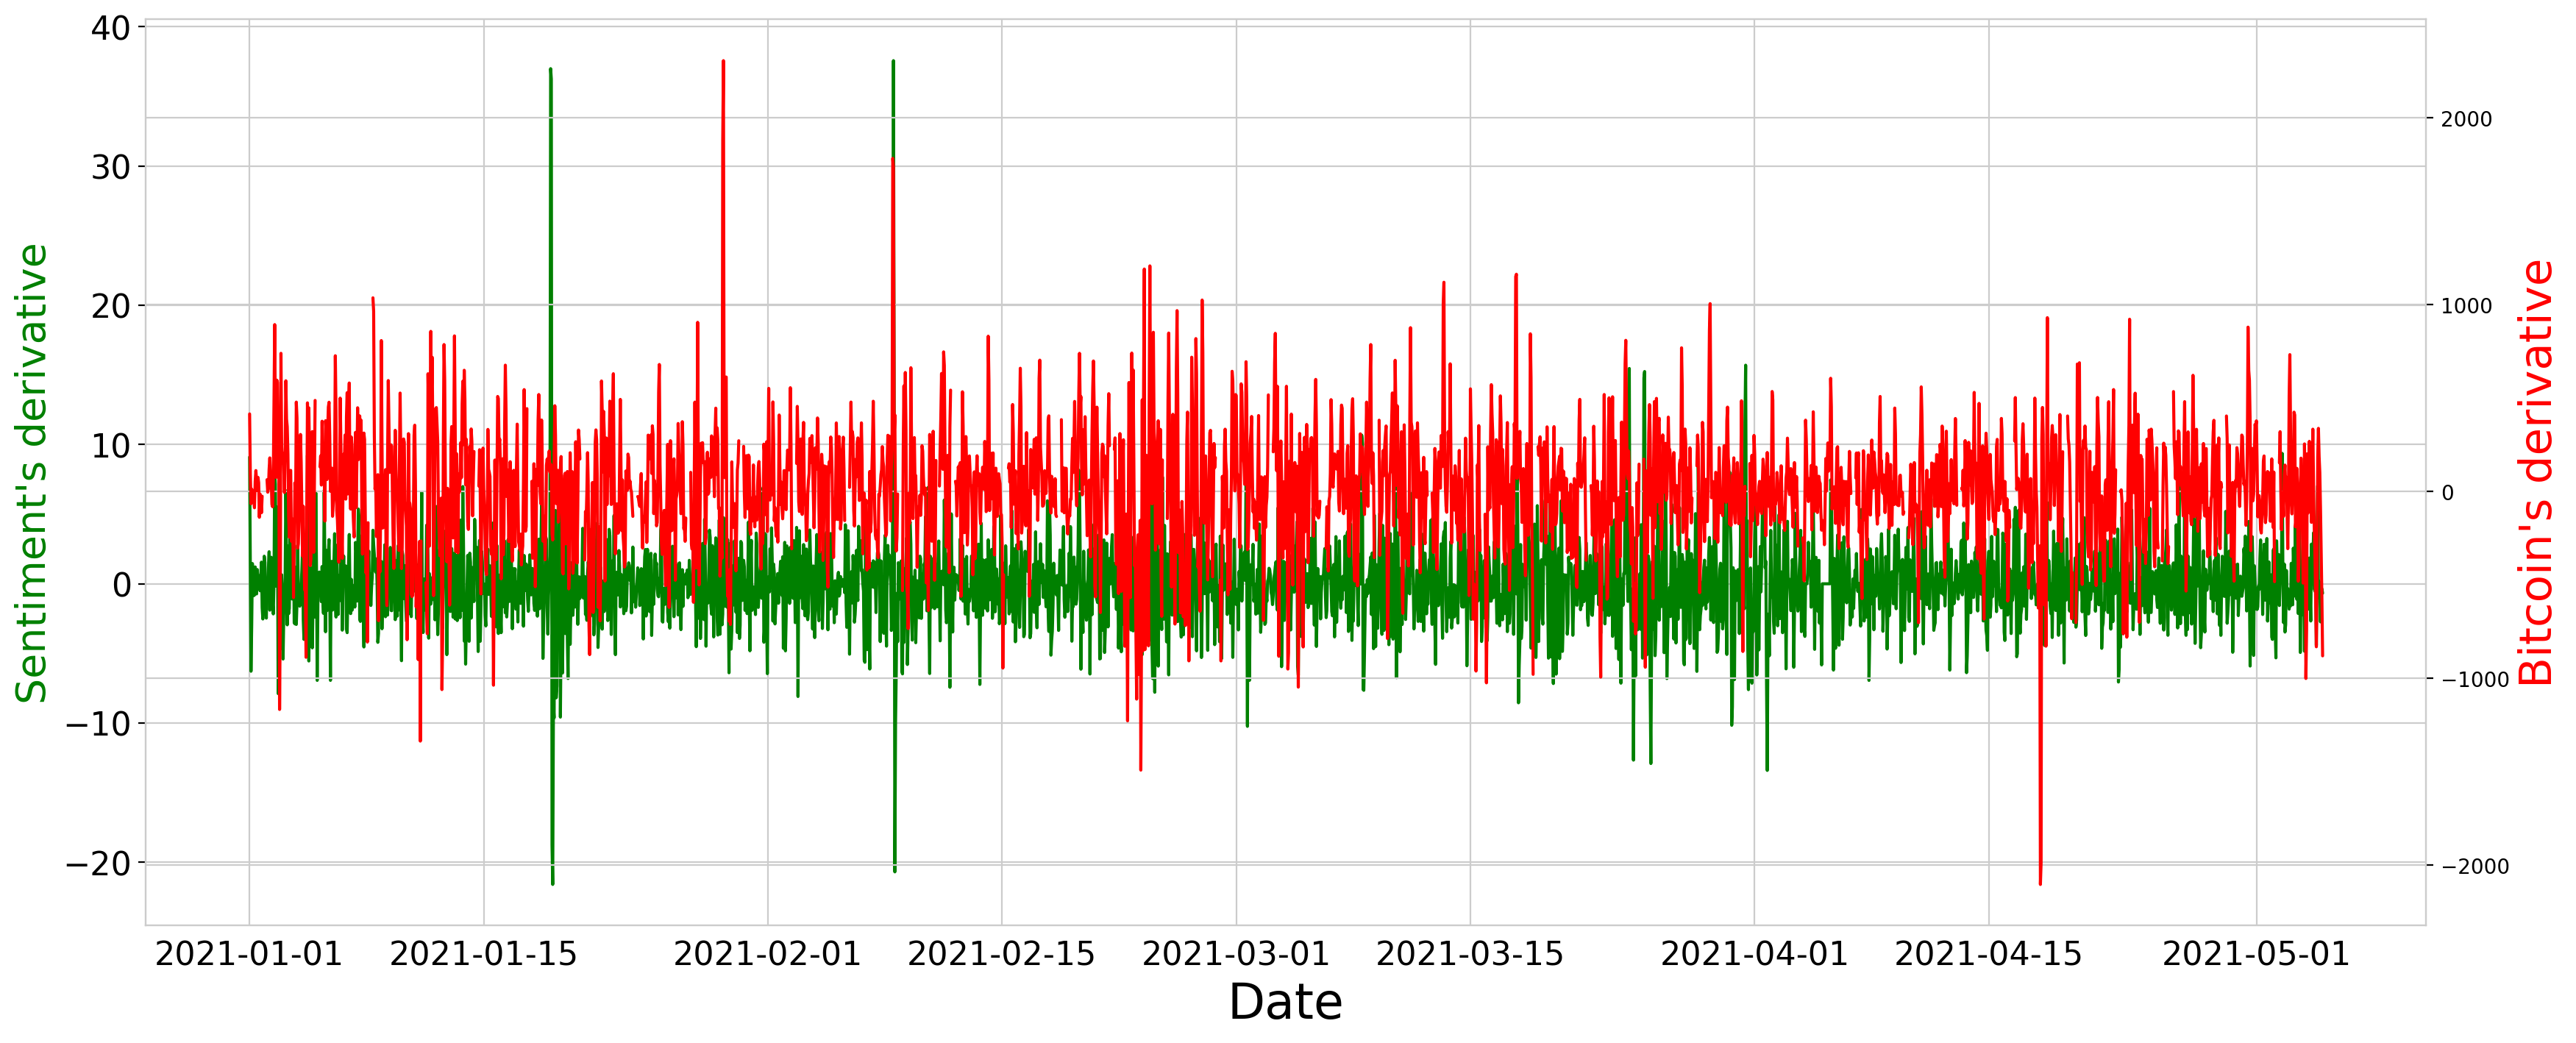

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
fig, ax1 = plt.subplots(figsize=(20,8),dpi=200)
#ax1.set_title("Derivative of Bitcoin currency and text's score", fontsize=18)
ax1.tick_params(labelsize=14)
# 设置 x 轴刻度颜色
ax1.tick_params(axis='x', colors='black')

plt.tick_params(labelsize=16)

# 设置 y 轴刻度颜色
ax1.tick_params(axis='y', colors='black')
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(btc_grouped.index, btc_grouped, 'r-')

ax1.set_xlabel("Date", fontsize=24)
ax1.set_ylabel("Sentiment's derivative", color='g', fontsize=20)
ax2.set_ylabel("Bitcoin's derivative", color='r', fontsize=22)
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.show()

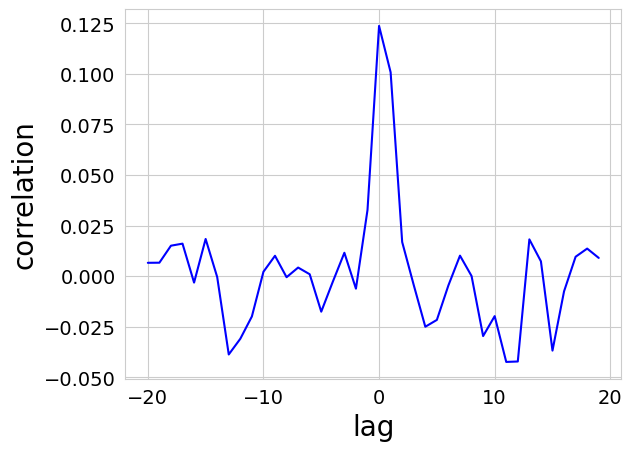

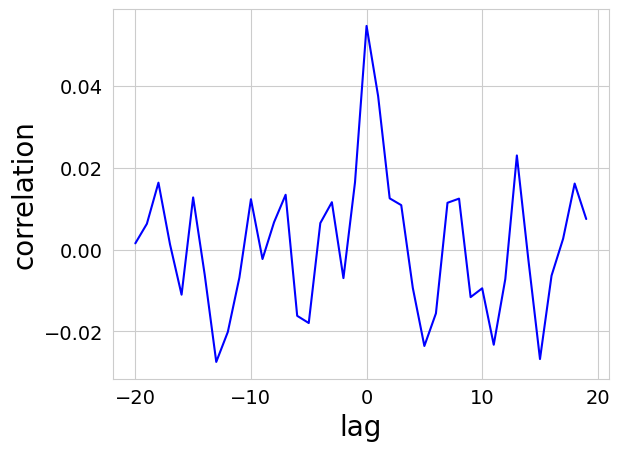

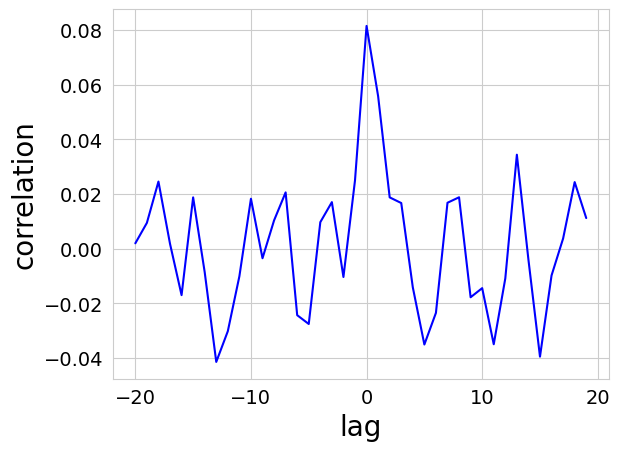

In [16]:
xcov = [crosscorr(tweets_grouped, btc_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov, color='#0000FF')
#plt.title("pearson cross-corelation")
plt.xlabel("lag", fontsize=20)
plt.ylabel("correlation", fontsize=20)
plt.tick_params(labelsize=14)
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.show()

xcov = [crosscorr(tweets_grouped, btc_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov, color='#0000FF')
#plt.title("kendall cross-corelation")
plt.xlabel("lag", fontsize=20)
plt.ylabel("correlation", fontsize=20)
plt.tick_params(labelsize=14)
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.show()

xcov = [crosscorr(tweets_grouped, btc_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov, color='#0000FF')
#plt.title("spearman cross-corelation")
plt.xlabel("lag", fontsize=20)
plt.ylabel("correlation", fontsize=20)
plt.tick_params(labelsize=14)
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.show()